## Research Proposal : Predicting Chronic Kidney Disease based on the 400 patients health records.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
from matplotlib import pyplot as plt
from scipy import stats


## Data Description ##
Overview, Chronic kidney disease, also called chronic kidney failure, describes the gradual loss of kidney function. Your kidneys filter wastes and excess fluids from your blood, which are then excreted in your urine. When chronic kidney disease reaches an advanced stage, dangerous levels of fluid, electrolytes and wastes can build up in your body.

I got this data from Kaggle. We have a 400 patients w/ medical records including the labolatory test taken in two montsh period. This has 26 column describe below and 400 rows which are the number of patients.

### Data Set Information: ###

* We use the following representation to collect the dataset 
* age	-	age	
* bp	-	blood pressure 
* sg	-	specific gravity 
* al	- albumin 
* su	-	sugar 
* rbc	-	red blood cells 
* pc	-	pus cell 
* pcc	-	pus cell clumps 
* ba	-	bacteria 
* bgr	-	blood glucose random 
* bu	-	blood urea 
* sc	-	serum creatinine 
* sod	-	sodium 
* pot	-	potassium 
* hemo	-	hemoglobin 
* pcv	-	packed cell volume 
* wc	-	white blood cell count 
* rc	-	red blood cell count 
* htn	-	hypertension 
* dm	-	diabetes mellitus 
* cad	-	coronary artery disease 
* appet	-	appetite 
* pe	-	pedal edema 
* ane	-	anemia 
* classification	-	class

## Problem:##
Does older people prone to Chronic Kidney Disease(CKD)?

## Hypothesis: 
From the data collected, there are more older people diagnose with CKD.

## Method of testing 
We have a 400 patients w/ medical records including the labolatory test taken in two montsh period. We explore the data, fill-in and changie some missing values to its nearest appropriate values, then drop the empty rows. There are 206 patients with complete records and 194 patient w/ incomplete records. We divide the complete data into two group. group 1 will be age 40 above w/ CDK and group 2 will be age 40 above without CDK. There 77 patients diagnose w/ CKD and 84 patients with out CDK. After visualization, we compare the two group using t-statistic to determine if there is a significant difference between the means of two groups.


## Explore the data

In [3]:
#Download data to DataFrame
df_kidney=pd.read_csv('kidney_disease.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.20,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.80,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.80,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.80,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.40,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.10,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.00,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.10,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.90,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.20,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
#check number of rows and columns
df_kidney.shape

(400, 26)

In [5]:
#Check the empty rows
df_kidney.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
#Rename long column name to short name
df_kidney.rename(columns={'classification':'class'}, inplace=True)

In [26]:
#check unusual values
df_kidney.pot.sort_values(ascending=False)

84     7.6
60     6.6
193    6.5
249    6.5
14     6.4
136    6.3
245    6.3
204    6.3
38     5.9
202    5.9
12     5.8
58     5.8
171    5.7
210    5.7
246    5.7
101    5.7
212    5.6
140    5.6
151    5.5
203    5.5
76     5.5
236    5.4
189    5.4
111    5.4
120    5.3
197    5.3
142    5.3
221    5.3
199    5.2
20     5.2
25     5.2
134    5.2
144    5.2
137    5.1
292    5.0
314    5.0
309    5.0
305    5.0
323    5.0
302    5.0
296    5.0
294    5.0
272    5.0
286    5.0
281    5.0
277    5.0
268    5.0
77     5.0
259    5.0
256    5.0
250    5.0
341    5.0
332    5.0
263    5.0
80     5.0
371    5.0
347    5.0
394    5.0
362    5.0
368    5.0
382    5.0
353    5.0
355    5.0
389    5.0
141    4.9
297    4.9
278    4.9
291    4.9
352    4.9
45     4.9
398    4.9
213    4.9
308    4.9
288    4.9
310    4.9
372    4.9
316    4.9
190    4.9
395    4.9
383    4.9
15     4.9
385    4.9
127    4.9
30     4.9
32     4.9
324    4.9
133    4.9
269    4.9
328    4.9
337    4.9
57     4.9

In [25]:
df_kidney.loc[128,'pot']=4.7
df_kidney.loc[61,'pot']=3.9

In [27]:
#Clean the rows with unneccessary values
df_kidney.wc=df_kidney.wc.str.replace('\t', '').str.replace('?', 'NaN')
df_kidney.rc=df_kidney.rc.str.replace('\t', '').str.replace('?', 'NaN')
df_kidney.pcv=df_kidney.pcv.str.replace('\t', '').str.replace('?', 'NaN')

In [28]:
def solve_grade(grades):
    all_sum= 0
    for grade in grades:
        all_sum+= grade
    mean_grade= all_sum/len(grades)
    
    if mean_grade>=90:
        return "A: perfect"
    elif mean_grade>=80:
        return 'B: very good'
    elif mean_grade>=70:
        return 'C: good'
    elif mean_grade>=60:
        return 'D: bad'
    else:
        return 'F: fail'
    
print(solve_grade([60,70,80,90]))
print(solve_grade([60,50,70,40,70,60]))
        

C: good
F: fail


In [29]:
#Fill those less than 9 missing rows w/appropriate or nearest values, for loop
df_kidney.bp.fillna(value=80, inplace=True)
df_kidney.age.fillna(value=52, inplace=True)
df_kidney.ane.fillna(value='no', inplace = True)
df_kidney.pe.fillna(value='no', inplace = True)
df_kidney.appet.fillna(value='good', inplace = True)
df_kidney.pcc.fillna(value='notpresent', inplace = True)
df_kidney.ba.fillna(value='notpresent', inplace = True)
df_kidney.rbc.fillna(value='normal', inplace = True)
df_kidney.pc.fillna(value='normal', inplace = True)

In [30]:
#Drop the all rows w/ missing values then save it to another data
df_kdny_clean=df_kidney.dropna(how='any')
df_kdny_clean.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
5,5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
12,12,68.0,70.0,1.015,3.0,1.0,normal,normal,present,notpresent,208.0,72.0,2.1,138.0,5.8,9.7,28,12200,3.4,yes,yes,yes,poor,yes,no,ckd


In [31]:
#Convert data type of some of the column.
df_kdny_clean.pcv = df_kdny_clean.pcv.astype(int)
df_kdny_clean.wc = df_kdny_clean.wc.astype(int)
df_kdny_clean.rc = df_kdny_clean.rc.astype(float)


In [32]:
#check if  data type is change
df_kdny_clean.dtypes


id         int64
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv        int32
wc         int32
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [33]:
#Check empty rows
df_kdny_clean.isna().sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

## Boxplot Visualization to tell us more about the data

[Text(0, 0.5, 'Sodium'), Text(0.5, 0, 'normal 135-145 mEq/L')]

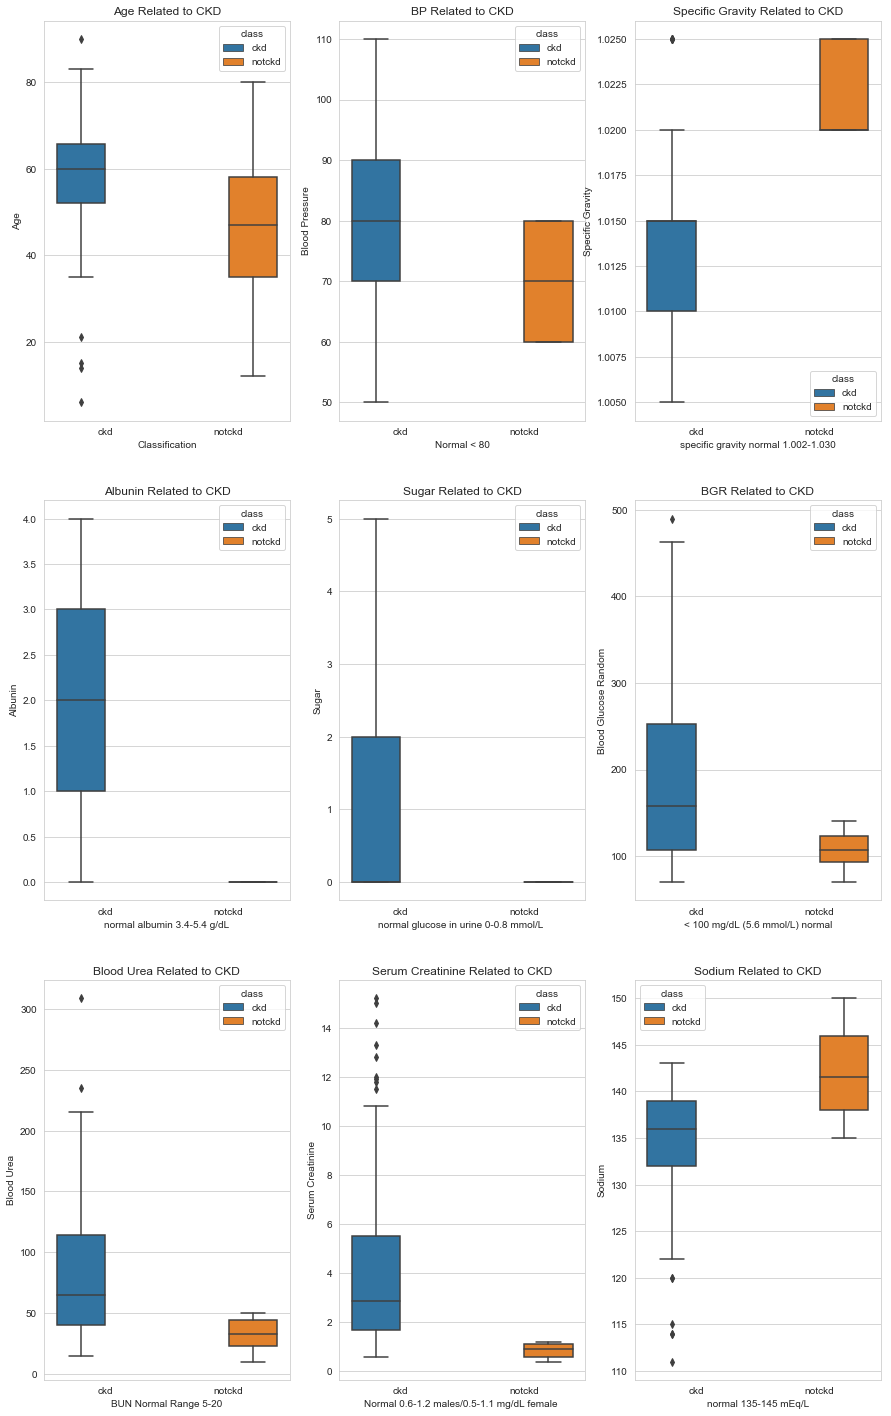

In [38]:
#Visualize to see more clearly about the data
plt.figure(figsize=(15, 25))
plt.subplot(3, 3, 1)
ax = sns.boxplot(x='class',y='age',hue='class',data=df_kdny_clean)  
plt.title('Age Related to CKD')
ax.set(xlabel='Classification', ylabel='Age')
          
plt.subplot(3, 3, 2)
ax = sns.boxplot(x='class',y='bp',hue='class',data=df_kdny_clean)  
plt.title('BP Related to CKD')
ax.set(xlabel='Normal < 80', ylabel='Blood Pressure')

plt.subplot(3, 3, 3)
ax = sns.boxplot(x='class',y='sg',hue='class',data=df_kdny_clean)  
plt.title('Specific Gravity Related to CKD')
ax.set(xlabel='specific gravity normal 1.002-1.030', ylabel='Specific Gravity')

plt.subplot(3, 3, 4)
ax = sns.boxplot(x='class',y='al',hue='class',data=df_kdny_clean)  
plt.title('Albunin Related to CKD')
ax.set(xlabel='normal albumin 3.4-5.4 g/dL', ylabel='Albunin')

plt.subplot(3, 3, 5)
ax = sns.boxplot(x='class',y='su',hue='class',data=df_kdny_clean)  
plt.title('Sugar Related to CKD')
ax.set(xlabel='normal glucose in urine 0-0.8 mmol/L ', ylabel='Sugar')

plt.subplot(3, 3, 6)
ax = sns.boxplot(x='class',y='bgr',hue='class',data=df_kdny_clean)  
plt.title('BGR Related to CKD')
ax.set(xlabel='< 100 mg/dL (5.6 mmol/L) normal', ylabel='Blood Glucose Random')

plt.subplot(3, 3, 7)
ax = sns.boxplot(x='class',y='bu',hue='class',data=df_kdny_clean)  
plt.title('Blood Urea Related to CKD')
ax.set(xlabel='BUN Normal Range 5-20', ylabel='Blood Urea')

plt.subplot(3, 3, 8)
ax = sns.boxplot(x='class',y='sc',hue='class',data=df_kdny_clean)  
plt.title('Serum Creatinine Related to CKD')
ax.set(xlabel='Normal 0.6-1.2 males/0.5-1.1 mg/dL female ', ylabel='Serum Creatinine')

plt.subplot(3, 3, 9)
ax = sns.boxplot(x='class',y='sod',hue='class',data=df_kdny_clean)  
plt.title('Sodium Related to CKD')
ax.set(xlabel='normal 135-145 mEq/L', ylabel='Sodium')





[Text(0, 0.5, 'Red Blood Cell Count'),
 Text(0.5, 0, '4.7-6.1 mcL men/4.2-5.4 women')]

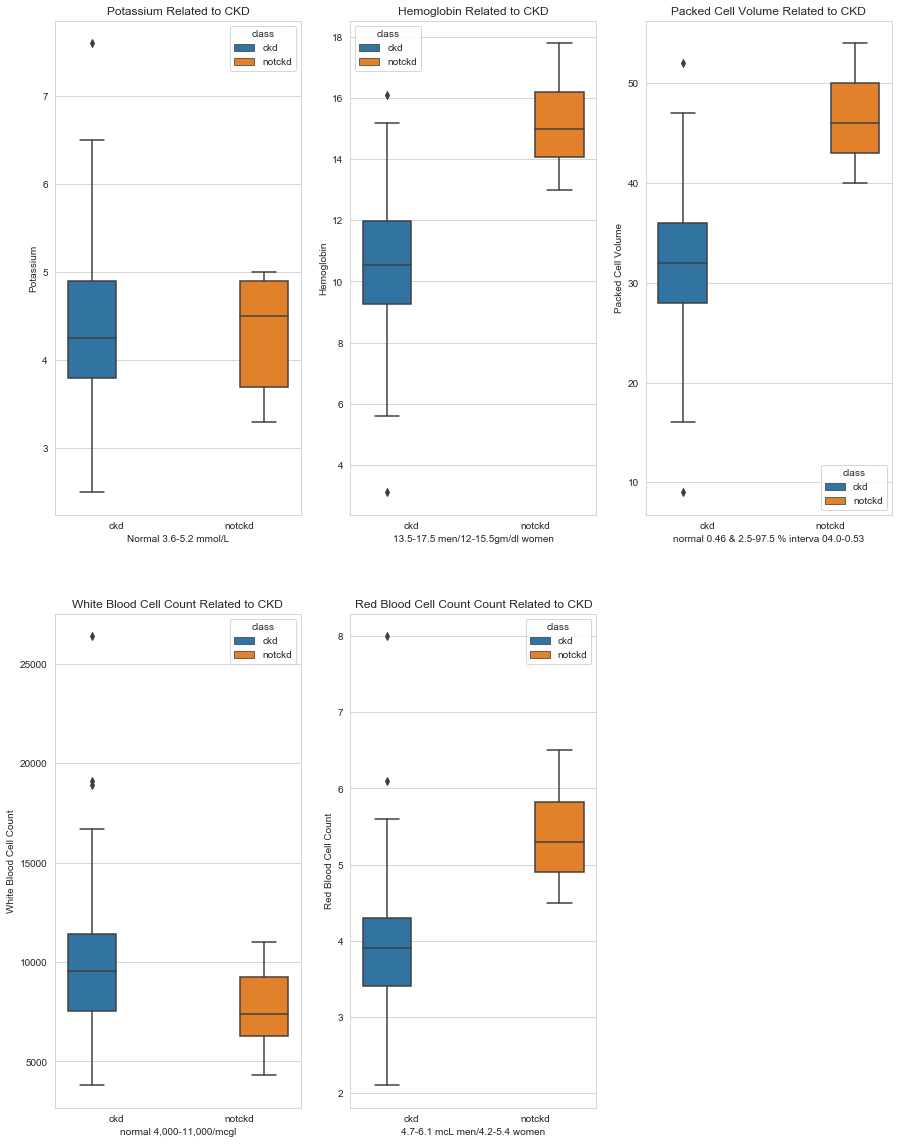

In [37]:
plt.figure(figsize=(15, 20))

plt.subplot(2, 3, 1)
ax = sns.boxplot(x='class',y='pot',hue='class',data=df_kdny_clean)  
plt.title('Potassium Related to CKD')
ax.set(xlabel='Normal 3.6-5.2 mmol/L', ylabel='Potassium')

plt.subplot(2, 3, 2)
ax = sns.boxplot(x='class',y='hemo',hue='class',data=df_kdny_clean)  
plt.title('Hemoglobin Related to CKD')
ax.set(xlabel='13.5-17.5 men/12-15.5gm/dl women', ylabel='Hemoglobin')

plt.subplot(2, 3, 3)
ax = sns.boxplot(x='class',y='pcv',hue='class',data=df_kdny_clean)  
plt.title('Packed Cell Volume Related to CKD')
ax.set(xlabel='normal 0.46 & 2.5-97.5 % interva 04.0-0.53', ylabel='Packed Cell Volume')

plt.subplot(2, 3, 4)
ax = sns.boxplot(x='class',y='wc',hue='class',data=df_kdny_clean)  
plt.title('White Blood Cell Count Related to CKD')
ax.set(xlabel='normal 4,000-11,000/mcgl', ylabel='White Blood Cell Count')

plt.subplot(2, 3, 5)
ax = sns.boxplot(x='class',y='rc',hue='class',data=df_kdny_clean)  
plt.title('Red Blood Cell Count Count Related to CKD')
ax.set(xlabel='4.7-6.1 mcL men/4.2-5.4 women', ylabel='Red Blood Cell Count')


### We focus first on the effect of age related to CKD

In [21]:
#Divide clean data into 2 groups
df_oldage_cdk = df_kdny_clean[(df_kdny_clean.age >= 40.0)&(df_kdny_clean['class'] == 'ckd')]
df_oldage_notcdk= df_kdny_clean[(df_kdny_clean.age >= 40.0)&(df_kdny_clean['class'] == 'notckd')]


In [22]:
print(len(df_oldage_cdk))
print(len(df_oldage_notcdk))

77
84


### Visualize

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


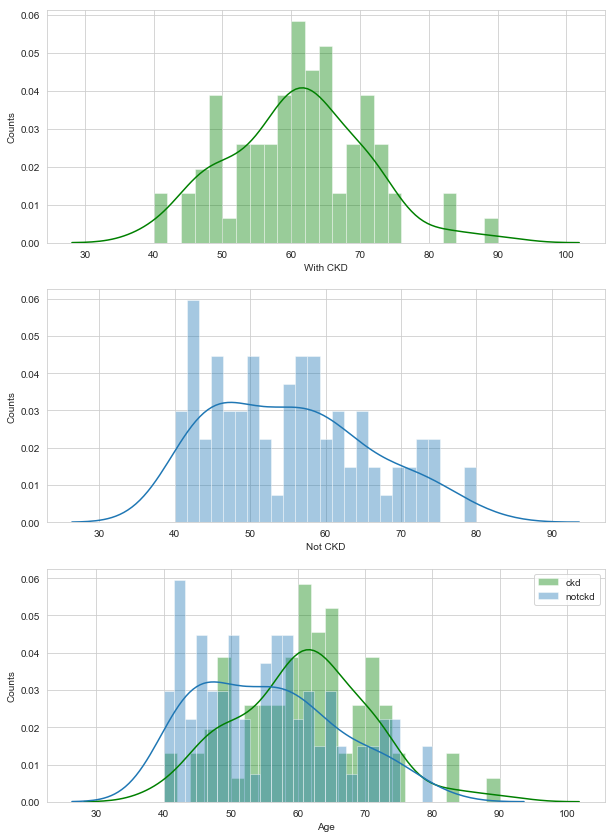

In [36]:
plt.figure(figsize=(10,8))
plt.subplot(311)
sns.distplot(df_oldage_cdk.age, bins=25, color='g', label='cdk')
plt.ylabel('Counts')
plt.xlabel('With CKD')


plt.subplot(312)
sns.distplot(df_oldage_notcdk.age, bins=25, label='notcdk') 
plt.ylabel('Counts')
plt.xlabel('Not CKD')
plt.subplots_adjust(top=1.5)


plt.subplot(313)
sns.distplot(df_oldage_cdk.age, bins=25, color='g', label='ckd') 
sns.distplot(df_oldage_notcdk.age, bins=25, label='notckd')
plt.subplots_adjust(top=1.5)

plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('Age')
plt.show()

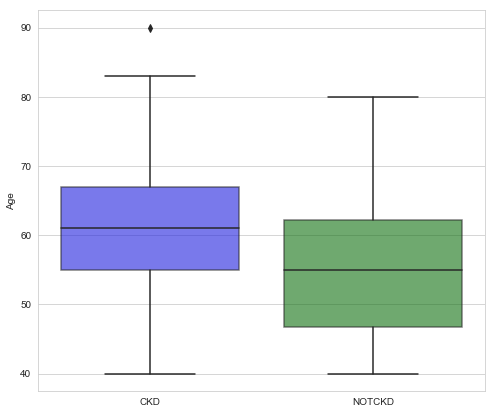

In [24]:
age_list = {'CKD' : df_oldage_cdk.age, 
            'NOTCKD' : df_oldage_notcdk.age 
            }
new_df = pd.DataFrame(data=age_list)

plt.figure(figsize=(8, 7))
sns.boxplot(data=new_df, palette=['b', 'g'], boxprops=dict(alpha=.6))
plt.ylabel('Age')
plt.show()

In [23]:
stats.ttest_ind(df_oldage_cdk.age,df_oldage_notcdk.age)

Ttest_indResult(statistic=3.3231322764189843, pvalue=0.001104729398306228)

## Conclusion: ##
Shown in the latest visualization, it is seen that there are more CKD on the age above 40 years, mostly high in the age of 55 to 65. The t-test outcomes shows that P-value is 0.0011 is less than .05 which is lower than the target P-value of 0.05. This tell us that the difference between our two groups(above 40 w/CDK and above 40 without CDK) is not due to random chance. So we can say that becoming older is more prone to CKD.

We can also use the t-test to find out the significance of the other lab record related to CDK. We can see also in the previous visualization that there are more CDK diagnose of the 400 patients w/ labolatory result than is NOT in the normal range. 